# Binary Classification

В данном соревновании вам предстоит решить задачу бинарной классификации. Вам будут даны тренировочная (10000 примеров) и тестовая (2000) выборки. Количество признаков — 30.

Для успешного решения данного задания вам предстоит правильно настроить валидацию, провести отбор признаков и подобрать параметры для итоговой модели.

В результате, необходимо предсказать вероятности положительного класса для данных из тестовой выборки.

In [247]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn import preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.patches as patches
from sklearn.metrics import roc_curve,auc
from scipy import interp
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, datasets
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold

In [68]:
path = '/Users/dariapetrukhina/Desktop/data_science/MADE/ml/A'
names = range(1,31)
df_train = pd.read_csv(path + '/'+'train.csv', names=names)
df_train = df_train.add_prefix('feature_')

In [220]:
sample_submit = pd.read_csv(path + '/'+'sample-submission.csv')

In [221]:
sample_submit

,0.5488135039273248
0,0.715189
1,0.602763
2,0.544883
3,0.423655
4,0.645894
...,...
1994,0.791282
1995,0.721198
1996,0.480108
1997,0.643864


In [69]:
names = range(1,31)
df_test = pd.read_csv(path + '/'+'test.csv', names=names)
df_test = df_test.add_prefix('feature_')

In [70]:
df_train_target = pd.read_csv(path +'/'+'train-target.csv', names ='-')
df_train_target.columns = ['result']


In [ ]:
df_train = 

In [71]:
df_all = pd.concat([df_train_new, df_test])

In [72]:
X_train = df_train_new.drop(['result'], axis = 1)
Y_train = df_train_new['result']

In [270]:
df_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,-220.530530,-70.197440,119.035181,20.711737,-6.152986,52.225051,-23.230903,-166.521871,-41.571463,2.620401,...,16.936420,46.543585,-80.962171,-146.652218,10.899085,4.370985,4.060272,40.680890,-37.942655,33.838225
1,-8.536541,-8.305435,-117.828269,-28.588333,14.223240,-42.087807,-45.538664,58.898976,27.749744,2.545916,...,57.027508,121.304258,31.507396,88.282912,66.766185,-4.363974,-5.791376,-32.101939,-52.255449,-4.826111
2,126.229973,133.463504,-105.511797,-149.110267,-3.673355,-104.302244,5.815395,100.838385,-46.240211,0.141700,...,4.819849,88.905713,51.475105,-73.257358,108.947287,8.567240,0.116269,-117.205053,-107.835928,-93.990332
3,369.571563,11.850181,-299.969407,29.371721,-3.457523,-115.901854,159.134323,-149.741411,-108.847522,0.078277,...,80.930568,-166.476192,-73.882682,108.222355,19.573192,-2.242024,0.515601,-25.218215,121.674228,-16.877368
4,-99.563708,-85.166292,-73.363391,-35.357907,5.437025,-54.892519,56.430532,-49.237377,-50.054608,2.586612,...,31.682235,209.163125,-22.847302,-62.067337,58.109167,2.862082,0.920341,-132.875142,3.492953,-15.799596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,-91.804097,96.380816,-93.520627,85.282425,-7.178058,-58.349354,233.433179,67.060275,100.601251,2.607880,...,29.122841,418.328185,35.687836,-13.778557,19.527466,1.860720,-0.928468,100.397658,-83.305311,-132.648400
9996,-232.083597,-60.861115,45.472736,5.731012,-7.987843,39.012270,-78.622327,77.938740,8.091318,0.138990,...,86.281234,-29.944248,39.432925,89.389986,-51.332647,-3.602386,0.323119,35.417264,-66.463502,5.783203
9997,-182.455289,-73.963540,-221.763797,-96.181654,-4.056096,-121.460703,-33.409815,-136.962854,204.767129,0.023433,...,-23.305907,102.332041,-67.763884,-50.665547,-41.240901,1.876399,0.719234,-55.564211,-207.574071,86.333468
9998,-268.344148,53.342079,-176.197832,45.925889,9.604607,59.329437,67.922422,81.571360,-85.361397,2.654512,...,-69.562156,44.399330,42.172405,32.269383,39.902889,2.205488,4.073904,-7.932393,2.626694,78.433097


## 1. Preprocessing

### 1.1 Standartization and Normalization

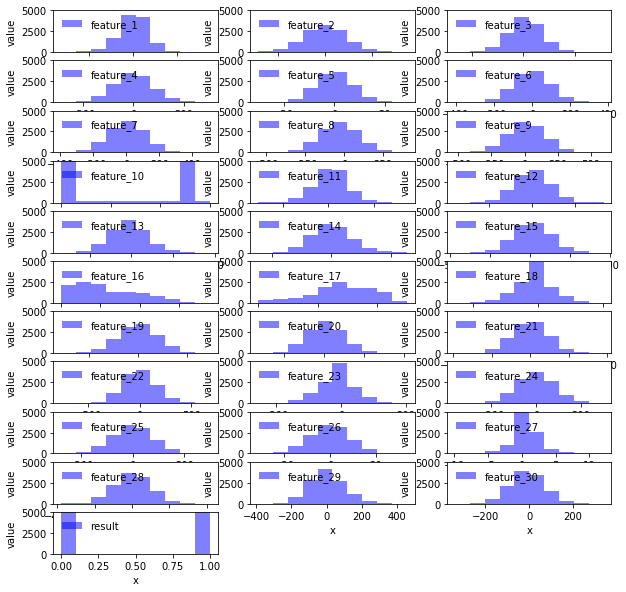

In [74]:
ncols = 3
nrows = int(np.ceil(len(df_all.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df_all.columns):

            ax.hist(df_all[df_all.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df_all.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('value')
            ax.set_ylim([0, 5000])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [75]:
scaler = MinMaxScaler(feature_range=(0, 100), copy=False)

columns_normalize = list(df_test.columns)

for column in columns_normalize:
    scaler.fit(np.array(df_all[column]).reshape(-1, 1))
    scaled = scaler.transform(np.array(df_all[column]).reshape(-1, 1))
    df_all[column] = pd.Series(np.reshape(scaled, newshape=scaled.shape[0]))

/Users/dariapetrukhina/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/dariapetrukhina/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


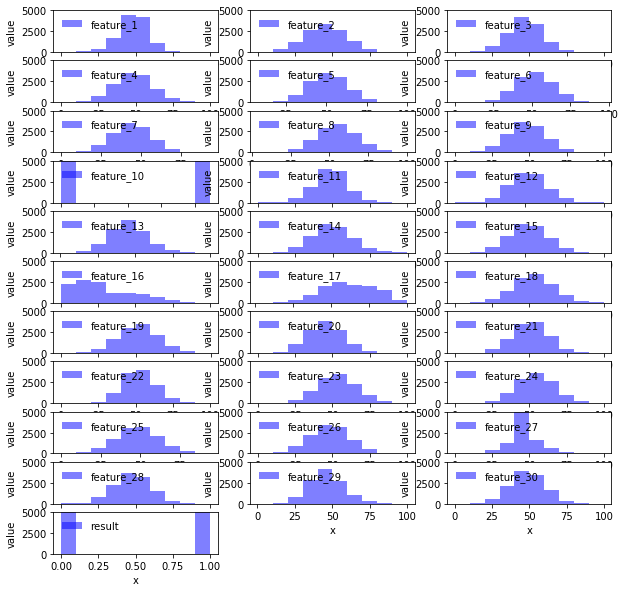

In [76]:
ncols = 3
nrows = int(np.ceil(len(df_all.columns) / (1.0*ncols)))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

# Lazy counter so we can remove unwated axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(df_all.columns):

            ax.hist(df_all[df_all.columns[counter]], bins=10, color='blue', alpha=0.5, label='{}'.format(df_all.columns[counter]))
            ax.set_xlabel('x')
            ax.set_ylabel('value')
            ax.set_ylim([0, 5000])
            leg = ax.legend(loc='upper left')
            leg.draw_frame(False)

        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

In [78]:
# calculate skeweness 

num_col = df_all.dtypes[df_all.dtypes != 'object'].index

# Calculate skew and sort
skew_feats = df_all[num_col].skew()
skew_feats = skew_feats.sort_values(ascending = False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
feature_16,0.700432
feature_29,0.311315
feature_22,0.230368
feature_13,0.176851
feature_14,0.152025
feature_20,0.120753
feature_27,0.080456
feature_6,0.078666
feature_15,0.070936
feature_9,0.057447


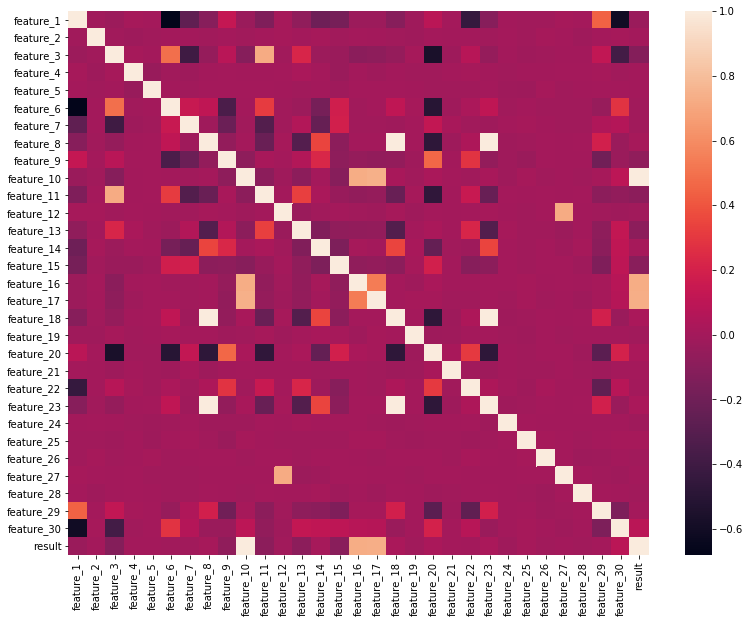

In [33]:
plt.figure(figsize=(13,10))
sns.heatmap(df_all.corr(), vmax=1)

In [79]:
# find the most correlated items

corr_matrix = df_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))

corr_df = pd.DataFrame(data = sol)
corr_df.head(5)

0
feature_18 feature_23  0.999978
feature_8  feature_18  0.999937
           feature_23  0.999937
feature_10 feature_17  0.735583
           feature_16  0.726550

In [80]:
# drop 3 most correlated (23, 18, 8)

df_all_updated = df_all.drop(['feature_18', 'feature_23', 'feature_8'], axis = 1)

In [81]:
df_updated_train =  df_all_updated.iloc[:len(df_train), :]
df_updated_test = df_all_updated.iloc[len(df_train):, :]

In [82]:
X_train = df_updated_train.drop(['result'], axis=1) # shape (3865, 258)
y_train = df_updated_train['result'] # shape (3865,)

X_test = df_updated_test.drop(['result'], axis=1) # shape (890, 258)

### 1.2 Feature Importance

In [83]:
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_)

[1.21937178e-03 3.00325394e-04 2.01011165e-03 2.29862943e-03
 3.18931266e-04 7.47786657e-04 5.70459686e-04 1.59435464e-03
 7.36946299e-01 2.76434918e-03 3.15044719e-03 1.06187330e-03
 1.66583247e-03 1.62007314e-03 1.03415765e-01 1.04098534e-01
 3.68087913e-04 5.59240236e-04 3.48694748e-04 7.77687666e-04
 3.47938531e-04 3.94729460e-04 3.36420456e-04 3.06064743e-02
 3.25864982e-04 9.84363813e-04 1.16735433e-03]


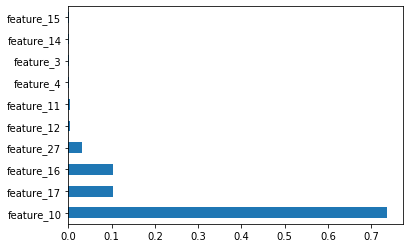

In [84]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

## 2. Cross Validation and Models testing

In [91]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,feature_10,feature_11,...,feature_20,feature_21,feature_22,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,41.653022,33.956958,54.207405,51.959344,40.700155,58.467594,41.255376,43.084082,87.350191,63.691908,...,42.154854,55.021019,56.152311,32.469113,49.941196,55.105401,63.332429,52.756573,41.627873,54.859711
1,47.939845,43.728723,37.945892,43.649167,75.139794,46.404087,38.785068,49.246912,84.867243,41.355604,...,49.677831,65.358236,61.317796,67.785518,59.658611,41.709333,18.720869,43.655978,39.936383,49.169690
2,51.936436,66.111787,38.791462,23.333607,44.891196,38.446273,44.471894,42.669018,4.723190,59.010559,...,36.066604,51.896843,59.079263,43.502127,66.995510,61.540843,45.472662,33.014883,33.367868,36.047875
3,59.152893,46.910975,25.441260,53.419098,45.255993,36.962573,61.450065,37.103070,2.608994,34.169192,...,60.855615,71.521479,41.434006,70.782896,51.449954,44.963588,47.280975,44.516702,60.491438,47.396172
4,45.240374,31.593614,40.998563,42.508066,60.289445,44.766244,50.076893,42.329909,86.223846,40.218348,...,50.692678,58.823128,67.388282,45.184256,58.152826,52.791324,49.113770,31.055531,46.524744,47.554782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.470490,60.257020,39.614698,62.843584,38.967592,44.324082,69.677742,55.723596,86.932802,42.245825,...,56.863414,58.163205,81.840251,52.443222,51.442000,51.255620,40.741742,60.223419,36.266902,30.358777
9996,41.310408,35.431016,49.157084,49.434145,37.598903,56.777554,35.121462,47.499229,4.632846,53.786437,...,35.591298,72.901113,50.867491,67.951938,39.116730,42.877317,46.409350,52.098422,38.257272,50.731005
9997,42.782169,33.362351,30.810351,32.255422,44.244292,36.251544,40.128188,64.984206,0.780784,35.002432,...,73.235805,44.644806,60.006937,46.898220,40.872069,51.279665,48.203090,40.722310,21.580788,62.585151
9998,40.235078,53.461886,33.938616,56.209521,67.333439,59.376312,51.349477,39.191046,88.487284,23.328086,...,53.230197,32.717943,56.004157,59.365336,54.986062,51.784362,63.394160,46.678081,46.422369,61.422496


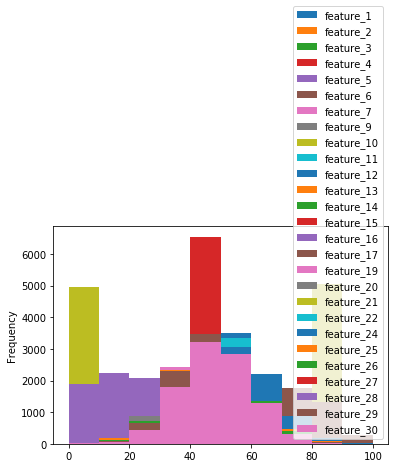

In [96]:
X_train.plot.hist()

In [113]:
Y_train

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: result, Length: 10000, dtype: int64

In [100]:
min_max_scaler = preprocessing.MinMaxScaler()

In [101]:
X_train_minmax = min_max_scaler.fit_transform(X_train)

In [103]:
X_train_minmax

array([[0.41653022, 0.33956958, 0.54207405, ..., 0.52756573, 0.41480057,
        0.54859711],
       [0.47939845, 0.43728723, 0.37945892, ..., 0.43655978, 0.39784284,
        0.4916969 ],
       [0.51936436, 0.66111787, 0.38791462, ..., 0.33014883, 0.33199135,
        0.36047875],
       ...,
       [0.42782169, 0.33362351, 0.30810351, ..., 0.4072231 , 0.21382207,
        0.62585151],
       [0.40235078, 0.53461886, 0.33938616, ..., 0.46678081, 0.46286695,
        0.61422496],
       [0.25467608, 0.23529875, 0.47855677, ..., 0.6678278 , 0.3781332 ,
        0.58186069]])

In [228]:
X_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_9,feature_10,feature_11,...,feature_20,feature_21,feature_22,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,41.653022,33.956958,54.207405,51.959344,40.700155,58.467594,41.255376,43.084082,87.350191,63.691908,...,42.154854,55.021019,56.152311,32.469113,49.941196,55.105401,63.332429,52.756573,41.627873,54.859711
1,47.939845,43.728723,37.945892,43.649167,75.139794,46.404087,38.785068,49.246912,84.867243,41.355604,...,49.677831,65.358236,61.317796,67.785518,59.658611,41.709333,18.720869,43.655978,39.936383,49.169690
2,51.936436,66.111787,38.791462,23.333607,44.891196,38.446273,44.471894,42.669018,4.723190,59.010559,...,36.066604,51.896843,59.079263,43.502127,66.995510,61.540843,45.472662,33.014883,33.367868,36.047875
3,59.152893,46.910975,25.441260,53.419098,45.255993,36.962573,61.450065,37.103070,2.608994,34.169192,...,60.855615,71.521479,41.434006,70.782896,51.449954,44.963588,47.280975,44.516702,60.491438,47.396172
4,45.240374,31.593614,40.998563,42.508066,60.289445,44.766244,50.076893,42.329909,86.223846,40.218348,...,50.692678,58.823128,67.388282,45.184256,58.152826,52.791324,49.113770,31.055531,46.524744,47.554782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,45.470490,60.257020,39.614698,62.843584,38.967592,44.324082,69.677742,55.723596,86.932802,42.245825,...,56.863414,58.163205,81.840251,52.443222,51.442000,51.255620,40.741742,60.223419,36.266902,30.358777
9996,41.310408,35.431016,49.157084,49.434145,37.598903,56.777554,35.121462,47.499229,4.632846,53.786437,...,35.591298,72.901113,50.867491,67.951938,39.116730,42.877317,46.409350,52.098422,38.257272,50.731005
9997,42.782169,33.362351,30.810351,32.255422,44.244292,36.251544,40.128188,64.984206,0.780784,35.002432,...,73.235805,44.644806,60.006937,46.898220,40.872069,51.279665,48.203090,40.722310,21.580788,62.585151
9998,40.235078,53.461886,33.938616,56.209521,67.333439,59.376312,51.349477,39.191046,88.487284,23.328086,...,53.230197,32.717943,56.004157,59.365336,54.986062,51.784362,63.394160,46.678081,46.422369,61.422496


In [229]:
Y_train

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    0
9998    1
9999    1
Name: result, Length: 10000, dtype: int64

In [241]:
predicted = cross_validation.cross_val_predict(LogisticRegression(), X_train, Y_train, cv=10)
print (metrics.accuracy_score(Y_train, predicted))

NameError: name 'cross_validation' is not defined

In [239]:
# function for cross validation

cv = 10

def cross_val(model, X_train, Y_train, cv=cv):
    scores = cross_val_score(model, X_train, Y_train, cv=cv)
    return -scores.mean()

In [238]:
model = LogisticRegression()
log_reg = cross_val(model, X_train_minmax, Y_train, cv)
log_reg

-1.0

In [233]:
model = LogisticRegression(max_iter=10000)
log_reg = cross_val_rocauc(model, X_train, Y_train, cv)
log_reg

-1.0

In [234]:
model = LogisticRegression(max_iter=1000, fit_intercept=False)
log_reg = cross_val_rocauc(model, X_train, Y_train, cv)
log_reg

-1.0

In [262]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [269]:
kfold = model_selection.KFold(n_splits=10, shuffle=True,random_state=7 )
model = LogisticRegression(max_iter=10000)
scoring = 'roc_auc'
results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
print(("AUC: %.3f (%.3f)") % (results.mean(), results.std()))

AUC: 1.000 (0.000)


In [205]:
clf.classes_

array([0, 1])